C:\Users\vatch\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 15ms/step - accuracy: 0.9264 - loss: 0.2426 - val_accuracy: 0.9847 - val_loss: 0.0481
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9882 - loss: 0.0376 - val_accuracy: 0.9879 - val_loss: 0.0362
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9931 - loss: 0.0208 - val_accuracy: 0.9903 - val_loss: 0.0307
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9964 - loss: 0.0109 - val_accuracy: 0.9896 - val_loss: 0.0351
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9968 - loss: 0.0089 - val_accuracy: 0.9903 - val_loss: 0.0354


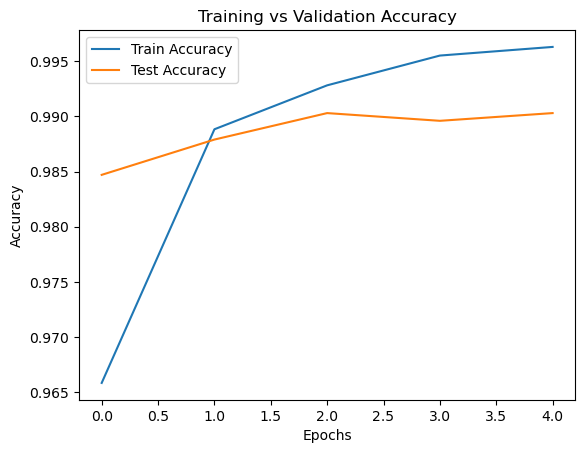

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# Normalize images and add channel dimension
train_images = train_images.astype('float32') / 255.0
train_images = np.expand_dims(train_images, axis=-1)
test_images = test_images.astype('float32') / 255.0
test_images = np.expand_dims(test_images, axis=-1)

# Define a CNN model with multiple filters
def build_multi_filter_cnn():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Build and train the CNN
cnn_model = build_multi_filter_cnn()
history = cnn_model.fit(train_images, train_labels, epochs=5, batch_size=32, validation_data=(test_images, test_labels))

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()
